# import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
Labels=["Normal","Fraud"]

In [3]:
#load the dataset
df=pd.read_csv("C:\\Users\\Admin\\Desktop\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

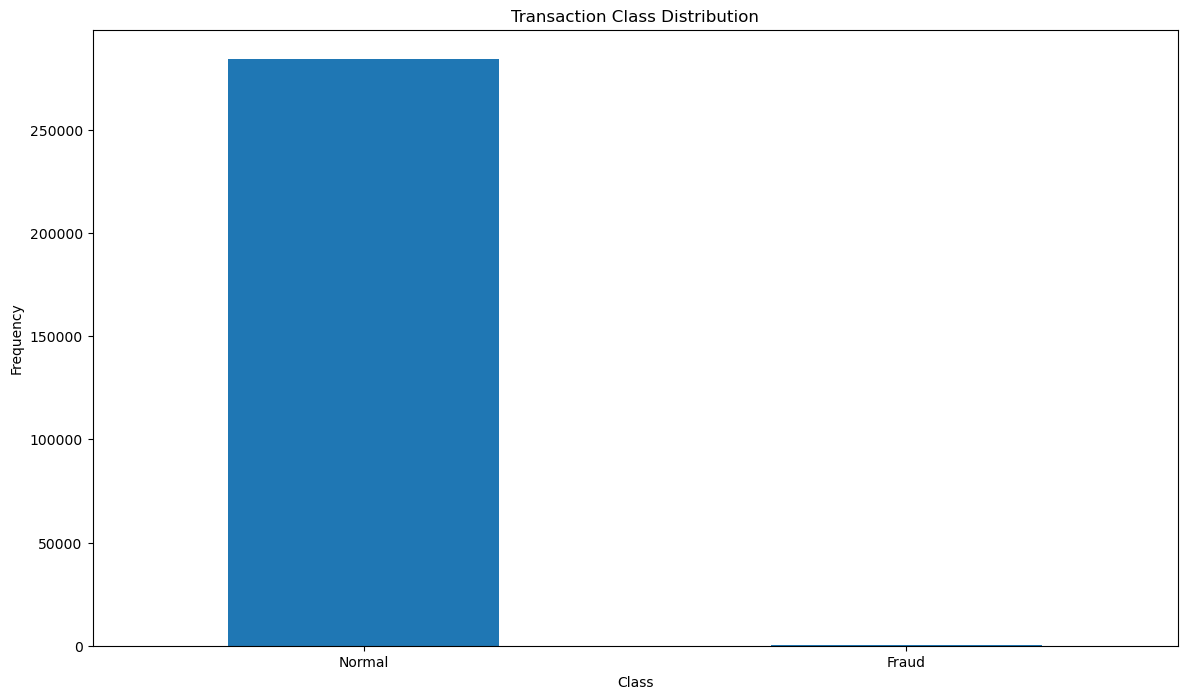

In [10]:
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),Labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [11]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [12]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

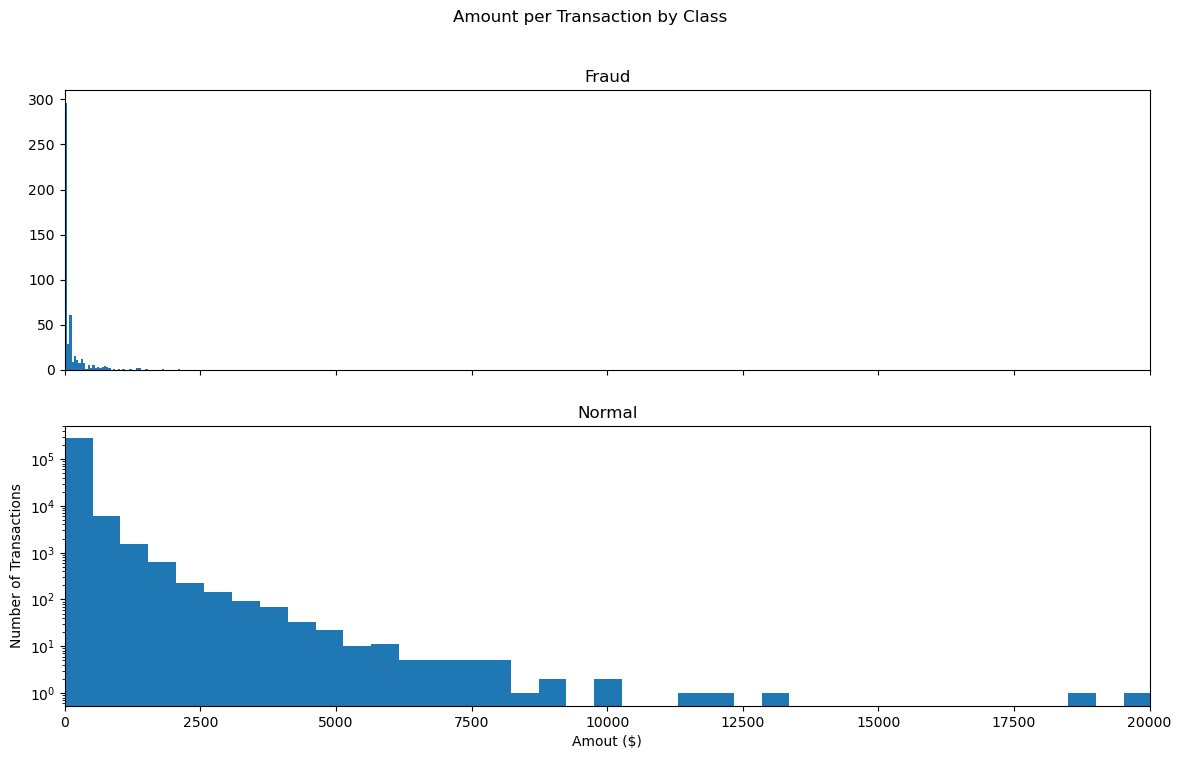

In [15]:
f, (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per Transaction by Class")
bins=50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title("Fraud")
ax2.hist(normal.Amount,bins=bins)
ax2.set_title("Normal")
plt.xlabel("Amout ($)")
plt.ylabel("Number of Transactions")
plt.xlim(0,20000)
plt.yscale('log')
plt.show();

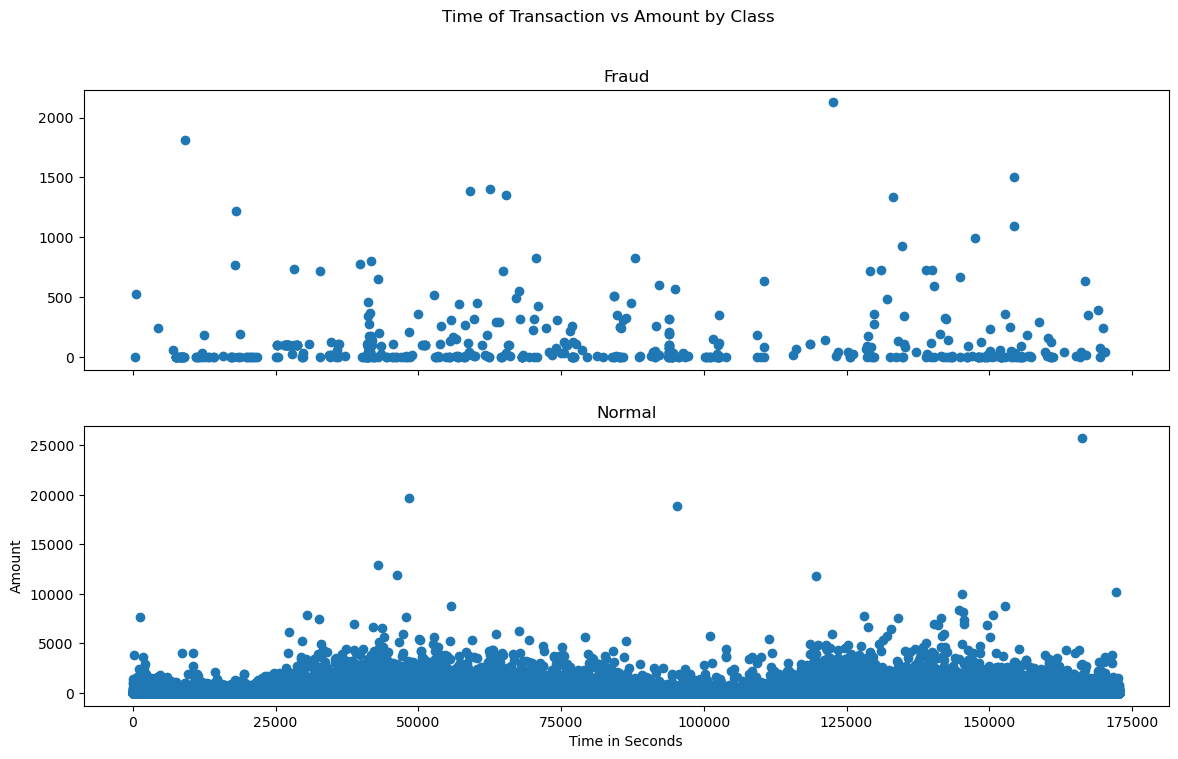

In [16]:
f, (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Time of Transaction vs Amount by Class")
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title("Fraud")
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title("Normal")
plt.xlabel("Time in Seconds")
plt.ylabel("Amount")
plt.show();

In [18]:
df1=df.sample(frac=0.1,random_state=1)
df1.shape

(28481, 31)

In [19]:
df.shape

(284807, 31)

In [20]:
Fraud=df1[df1['Class']==1]
Valid=df1[df1['Class']==0]
outlier_fraction=len(Fraud)/float(len(Valid))

In [21]:
print(outlier_fraction)
print("Fraud Cases :{}".format(len(Fraud)))
print("Valid Cases :{}".format(len(Valid)))

0.0017234102419808666
Fraud Cases :49
Valid Cases :28432


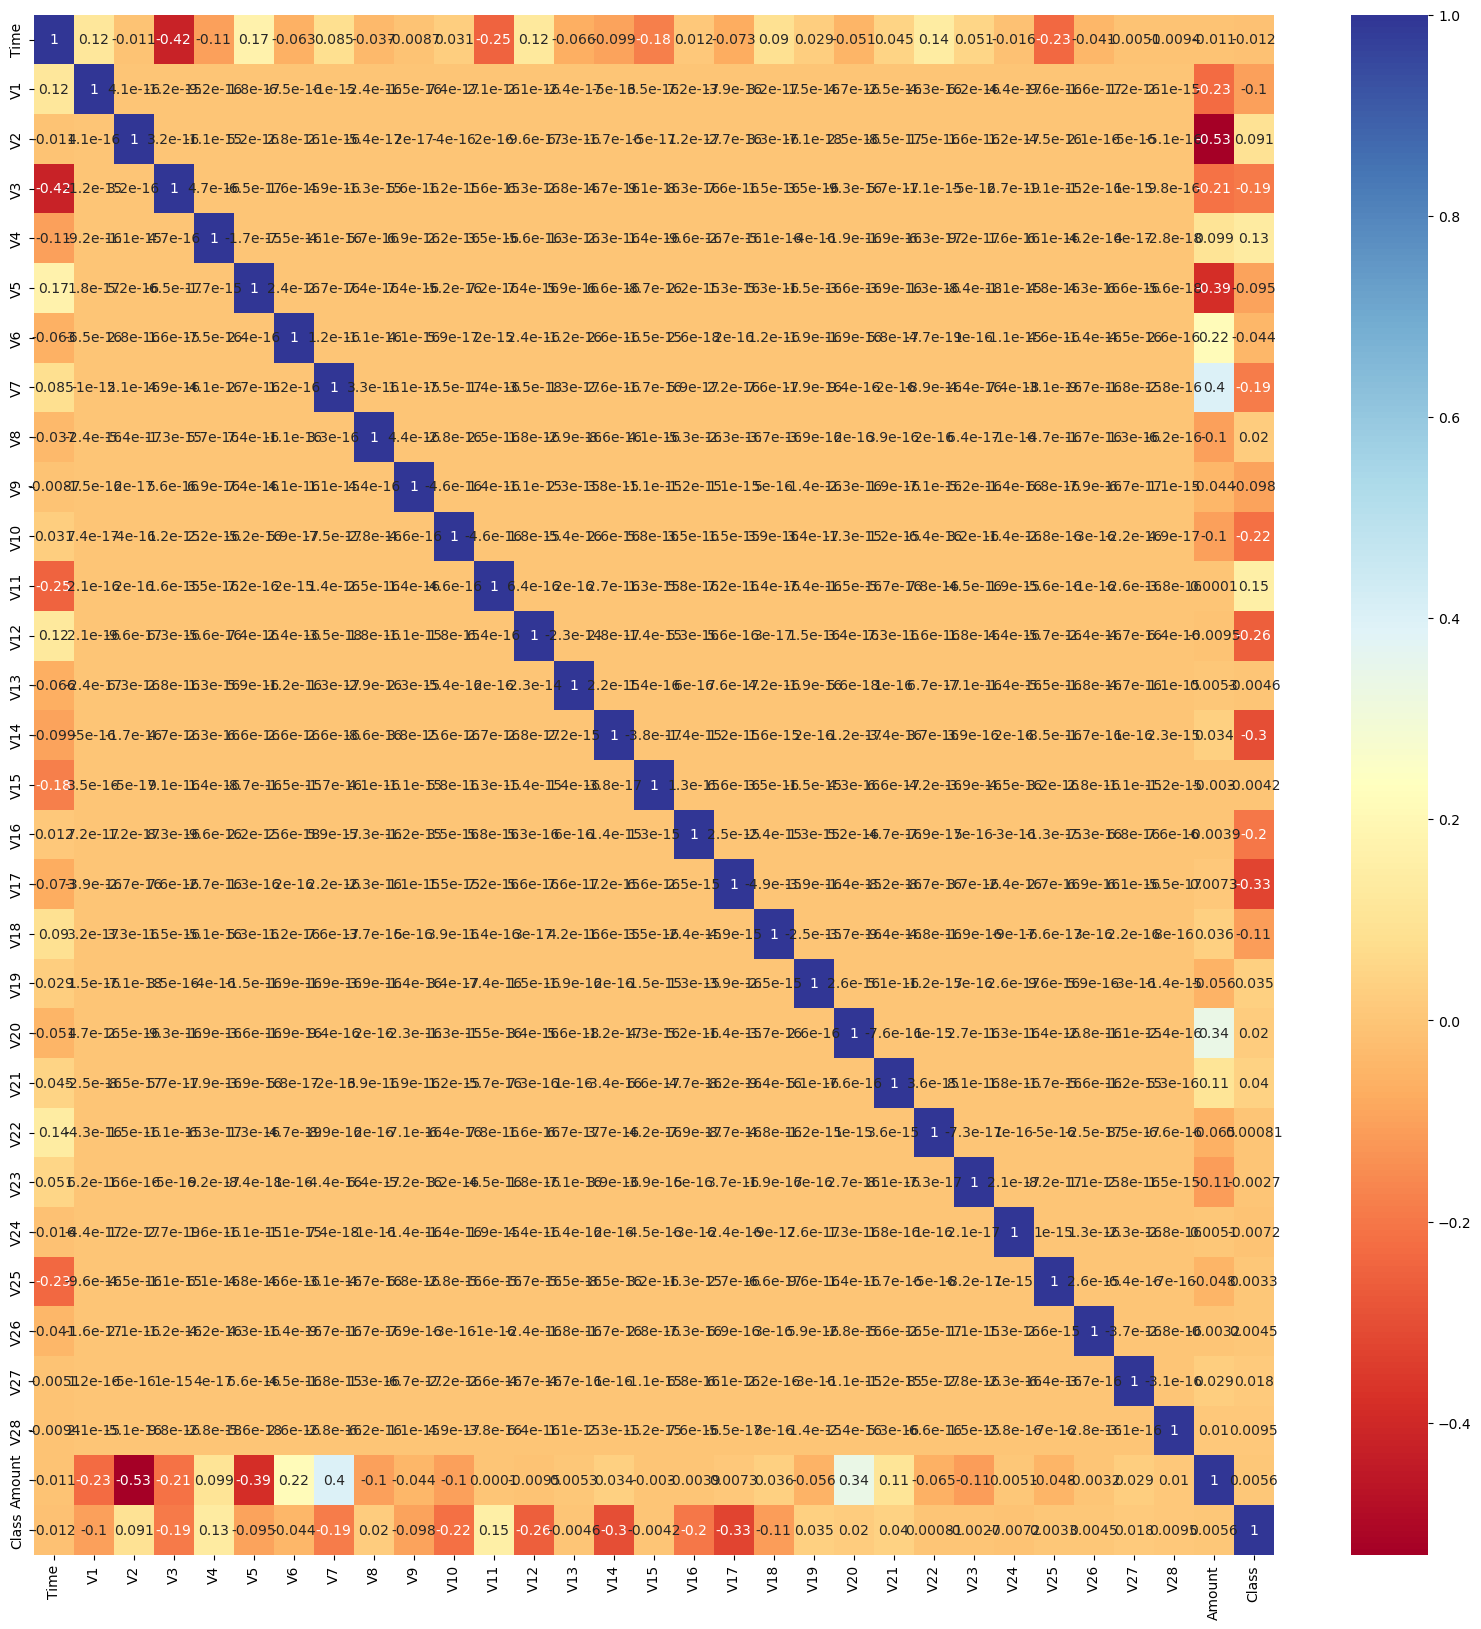

In [25]:
corrmat=df1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlBu")

In [26]:
columns=df1.columns.tolist()
columns=[c for c in columns if c not in ['Class']]
target='Class'
state=np.random.RandomState(42)
X=df1[columns]
Y=df1[target]
x_outliers=state.uniform(low=1, high=1,size=(X.shape[0],X.shape[1]))
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [35]:
#model prediction
classifiers={
    "Isolation Forest":IsolationForest(n_estimators=100,max_samples=len(X),
            contamination=outlier_fraction,random_state=state,verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm="auto",
                                             leaf_size=30,metric='minkowski',
                                             p=2,metric_params=None,contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,
                                         max_iter=-1)
           }

In [36]:
type(classifiers)

dict

In [ ]:
n_outliers=len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_prediction=clf.negative_outlier_factor_
    elif clf_name=="Support Vector Machine":
            clf.fit(X)
            y_pred=clf.predict(X)
    else:
            clf.fit(X)
            scores_prediction=clf.decision_function(X)
            y_pred=clf.predict(X)
            
            #O FOR VALID TRANSACTIONS AND 1 FOR FRAUD
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    n_errors=(y_pred != Y).sum()
    
    print("{}:{}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))
        
            
            

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest:73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

